In [1]:
# laod library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import sklearn.metrics
import seaborn as sn

In [2]:
# Load in data
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.fashion_mnist.load_data()
K = len(set(y_train))

x_train, x_test = x_train/255., x_test/255.

x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)


In [3]:
x_train.shape

(60000, 28, 28, 1)

In [35]:
i = tf.keras.layers.Input(shape=x_train[0].shape)
x = tf.keras.layers.Conv2D(32, (4,4), strides = 2, activation='relu')(i)
x = tf.keras.layers.Conv2D(32*2, (4,4), strides = 2, activation='relu')(x)
x = tf.keras.layers.Conv2D(32*8, (4,4), strides = 2, activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.05)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.05)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.05)(x)
x = tf.keras.layers.Dense(K, activation='softmax')(x)
model = tf.keras.models.Model(i, x)

In [36]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy" , metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.6364 - accuracy: 0.7728 - val_loss: 0.4418 - val_accuracy: 0.8405
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3918 - accuracy: 0.8545 - val_loss: 0.3960 - val_accuracy: 0.8544
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3294 - accuracy: 0.8772 - val_loss: 0.4028 - val_accuracy: 0.8561
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2948 - accuracy: 0.8897 - val_loss: 0.3938 - val_accuracy: 0.8633
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2689 - accuracy: 0.8981 - val_loss: 0.3925 - val_accuracy: 0.8706


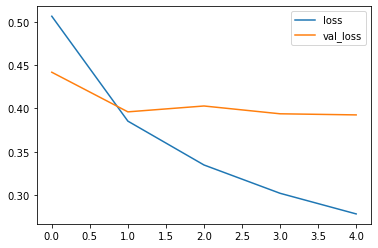

In [37]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

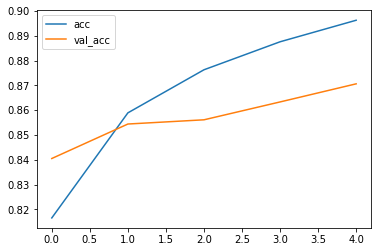

In [38]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

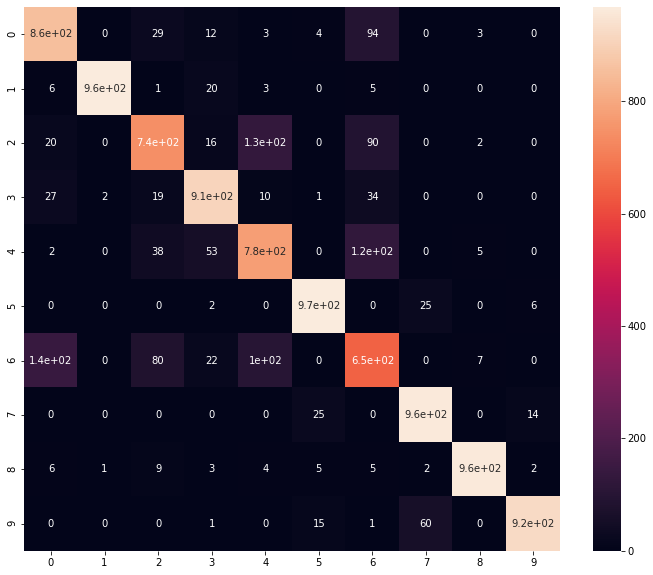

In [39]:
p_test = model.predict(x_test).argmax(axis=1)
cm = sklearn.metrics.confusion_matrix(y_test,p_test)
plt.figure(figsize=(12,10))
sn.heatmap(cm, annot=True);